In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os 
import json
import sys
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv("PUIDATA")

'/home/cusp/vmr286/PUIdata'

In [3]:
pui = os.getenv("PUIDATA")
os.system('curl -O "https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv" ')
os.system("mv rows.csv " + pui)
os.system('curl -O "https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v2.zip" ')
os.system("mv mn_mappluto_16v2.zip " + pui)
os.system("unzip -o "+ pui +"/mn_mappluto_16v2.zip -d " + pui + "/Manhattan ")

0

In [4]:
nrg = gp.GeoDataFrame.from_csv(pui + "/rows.csv")
bsize = gp.GeoDataFrame.from_file(pui + "/Manhattan/MNMapPLUTO.shp")

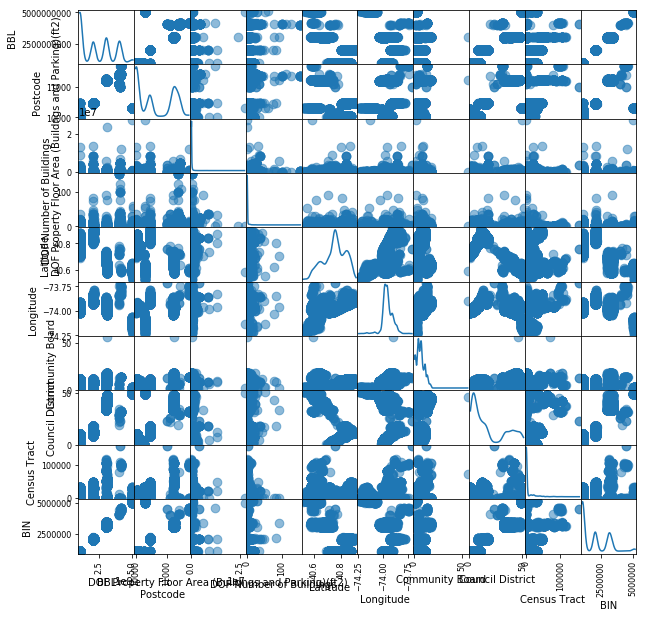

In [5]:
from pandas.tools.plotting import scatter_matrix
sfig = scatter_matrix(nrg, s=300, figsize=(10,10),diagonal='kde')

It seems there exsit linear and non-linear relations between several varaibles in the data set.

In [6]:
nrg.columns

Index(['BBL', 'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Postcode',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'NTA'],
      dtype='object')

In [7]:
bsize.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea',
       'SanitBoro', 'SanitDistr', 'SanitSub', 'Address', 'ZoneDist1',
       'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2',
       'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth',
       'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType',
       'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot',
       'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL',
       'CondoNo', 'Tract2010', 'XCoord', 'YCoord'

In [8]:
nrg = nrg[['BBL', 'Site EUI(kBtu/ft2)', 'Reported Property Floor Area (Building(s)) (ft²)','DOF Property Floor Area (Buildngs and Parking)(ft2)','DOF Number of Buildings']]

In [9]:
nrg.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),DOF Number of Buildings
Record Number,,,,,
12086,1.000410e+09,NaN,918919,NaN,NaN
14354,4.021460e+09,NaN,NaN,82730.0,1.0
12150,2.027620e+09,NaN,64200,NaN,NaN
12590,1.006700e+09,NaN,NaN,440360.0,1.0
15591,2.048300e+09,NaN,50000,NaN,NaN


In [10]:
bsize = bsize[['UnitsRes', 'UnitsTotal', 'YearBuilt', 'BBL']]

In [11]:
bsize.head()

,UnitsRes,UnitsTotal,YearBuilt,BBL
0,0,0,1900,1.000010e+09
1,0,0,1987,1.000090e+09
2,500,602,1902,1.000158e+09
3,0,50,1900,1.000130e+09
4,0,0,1900,1.000010e+09


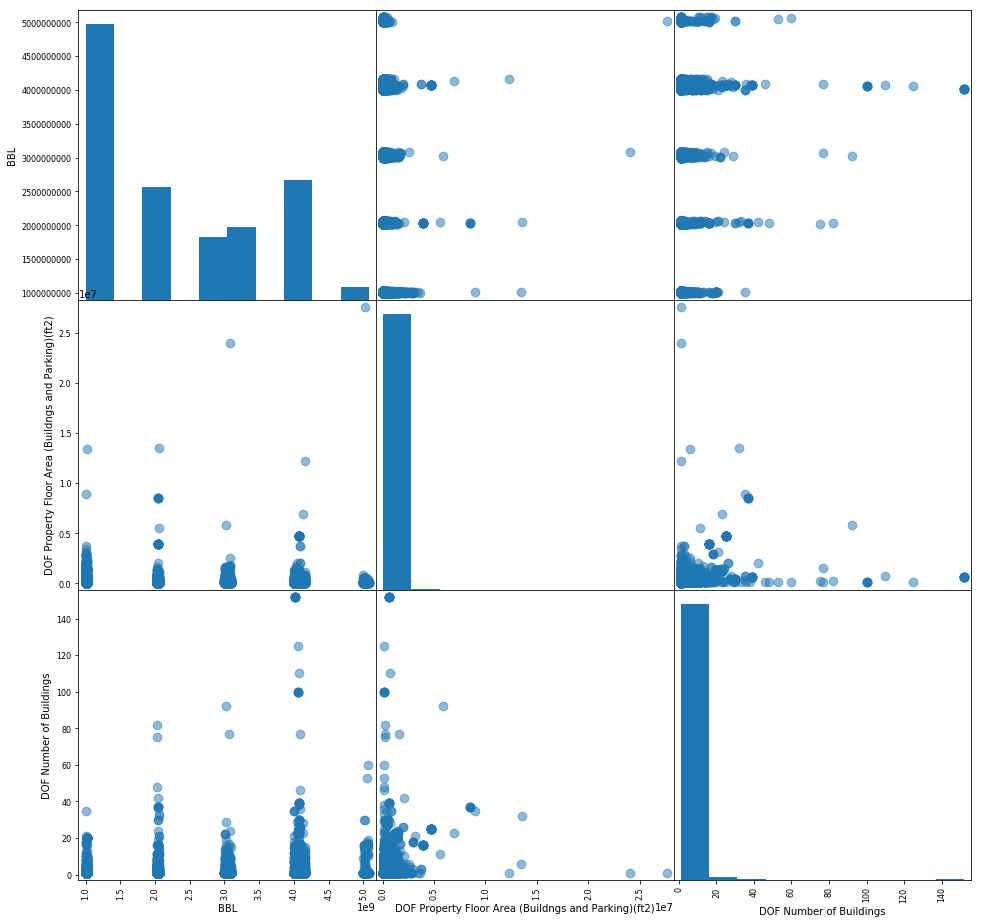

In [13]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16));

For the 3 numerical variables displayed in the graph, there seems are no linear relations.

In [14]:
for i in nrg.keys():
    nrg[i] = pd.to_numeric(nrg[i],errors='coerce').astype(float)
for i in bsize.keys():
    bsize[i] = pd.to_numeric(bsize[i],errors='coerce').astype(float)

In [15]:
bsize.keys()

Index(['UnitsRes', 'UnitsTotal', 'YearBuilt', 'BBL'], dtype='object')

In [16]:
nrg.keys()

Index(['BBL', 'Site EUI(kBtu/ft2)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'DOF Number of Buildings'],
      dtype='object')

In [17]:
indx = np.isnan(nrg['Site EUI(kBtu/ft2)']).sum()
print ("invalid entries changed to NaN %d"%sum(indx))

invalid entries changed to NaN 4623


In [18]:
(bsize.BBL.values[0]), (nrg.BBL.values[0])

(1000010201.0, 1000410001.0)

In [19]:
bblnrgdata = pd.merge(nrg, bsize, on='BBL').dropna()
bblnrgdata.shape

(4688, 8)

In [20]:
bblnrgdata.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),DOF Number of Buildings,UnitsRes,UnitsTotal,YearBuilt
2,1.013110e+09,125.4,330000.0,313200.0,1.0,0.0,56.0,1977.0
15,1.007660e+09,122.3,59468.0,53168.0,1.0,0.0,8.0,1912.0
16,1.008150e+09,117.0,364000.0,364000.0,1.0,0.0,24.0,1954.0
18,1.005050e+09,82.1,235370.0,214110.0,1.0,0.0,24.0,1926.0
19,1.021420e+09,137.7,64806.0,64816.0,1.0,54.0,62.0,1924.0


Text(0.5,1,'Total energy consumption versus number of units.')

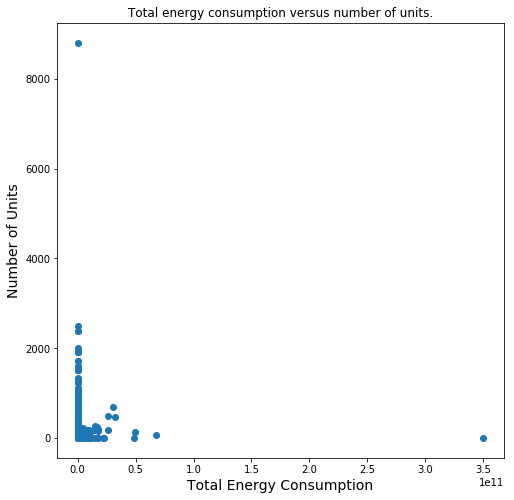

In [21]:
bblnrgdata['Total'] = bblnrgdata['Site EUI(kBtu/ft2)'] * bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)']
pl.figure(figsize=(8,8)) 
pl.plot(bblnrgdata['Total'],bblnrgdata['UnitsTotal'],'o')
pl.xlabel('Total Energy Consumption',size=14)
pl.ylabel('Number of Units',size=14)
pl.title("Total energy consumption versus number of units.")


Because some extreme values, the pattern is not clear enough to be recognized.

(1, 1000)

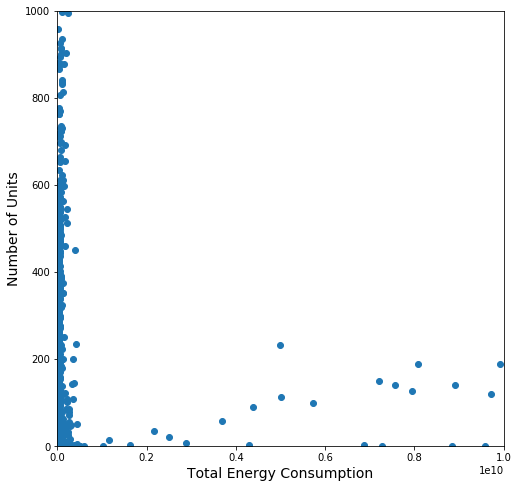

In [22]:
pl.figure(figsize=(8,8)) 
pl.plot(bblnrgdata['Total'],bblnrgdata['UnitsTotal'],'o')
pl.xlabel('Total Energy Consumption',size=14)
pl.ylabel('Number of Units',size=14)
pl.xlim(1000,1e10)
pl.ylim(1,1000)

In [23]:
bblnrgdata['Reported Property Floor Area (Building(s))'] = \
            pd.to_numeric(bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)'], 
                          errors='coerce').astype(float)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


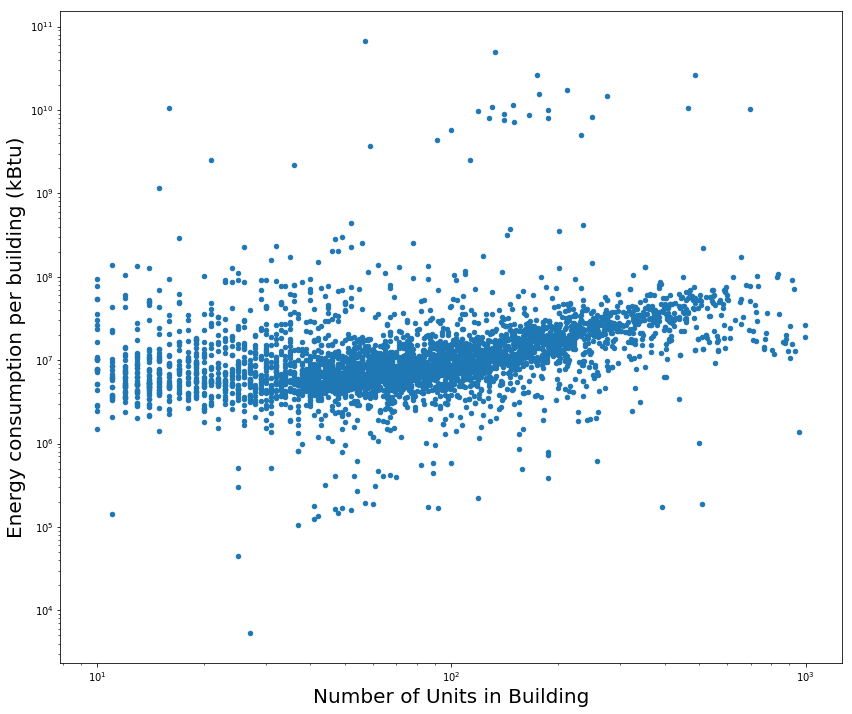

In [24]:
bblnrgdata['nrg'] = bblnrgdata['Total'] / bblnrgdata['DOF Number of Buildings']

bblnrgdataCut = bblnrgdata[(bblnrgdata.nrg > 1000) * (bblnrgdata.UnitsTotal>=10) * 
                           (bblnrgdata.UnitsTotal<1000)]

ax = bblnrgdataCut.plot(kind='scatter', y='nrg', x='UnitsTotal', 
                   marker='o',  figsize=(14, 12), loglog=True)
yl = ax.set_xlabel("Number of Units in Building", fontsize=20)
xl = ax.set_ylabel("Energy consumption per building (kBtu)", fontsize=20)

# Units vs Energy, IV: Units

In [25]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

Text(0,0.5,'Total energy consumption')

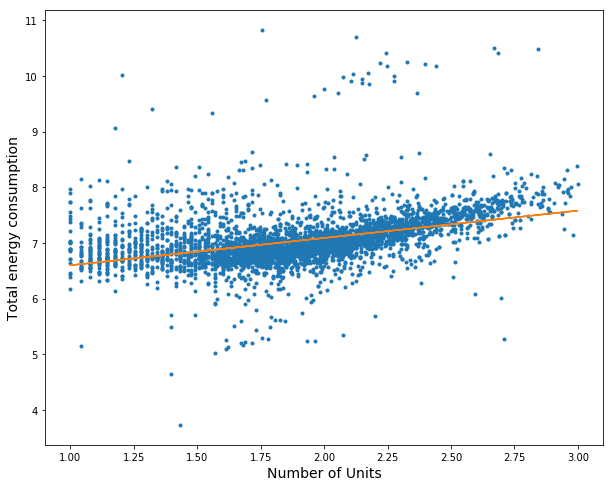

In [26]:
u = bblnrgdataCut['UnitsTotal']
t = bblnrgdataCut['Total']

U = sm.add_constant(np.log10(u))
lm1 = sm.OLS(np.log10(t), U, missing='drop').fit() 

fig = pl.figure(figsize=(10,8)) 
pl.plot(np.log10(u),np.log10(t),'.')
pl.plot(np.log10(u),lm1.predict())
pl.xlabel('Number of Units',size=14)
pl.ylabel('Total energy consumption',size=14)

# Energy vs Units, IV: Energy

Text(0,0.5,'Number of Units')

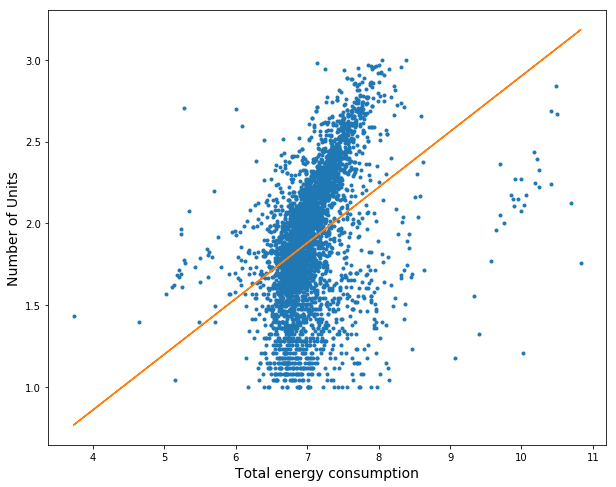

In [27]:
t = bblnrgdataCut['Total']
u = bblnrgdataCut['UnitsTotal']

T = sm.add_constant(np.log10(t))
lm2 = sm.OLS(np.log10(u), T, missing='drop').fit() 

fig = pl.figure(figsize=(10,8)) 
pl.plot(np.log10(t),np.log10(u),'.')
pl.plot(np.log10(t),lm2.predict())
pl.xlabel('Total energy consumption',size=14)
pl.ylabel('Number of Units',size=14)

## ASH - SCORE 60 ( -40 for not attempting the modelling part of the question). Extra Credit Missing